# Heart Disease Prediction

# Data Preprocessing

In [1]:
# Step 1:Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Step 2:import Csv file
data=pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [5]:
#step-3:Check Data information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#step-4:Check Null Values

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#Step-5:Check duplicate values

In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [11]:
#Step-6:Delete Duplicate values

In [12]:
data=data.drop_duplicates()

In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [15]:
#Step 7:Scale Numerical variables

In [16]:
X=data.drop('target',axis=1)
Y=data['target']


In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xs=scaler.fit_transform(X)

In [18]:
#Split the data


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(xs,Y,test_size=0.4,random_state=1)

In [20]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# EDA

<Axes: >

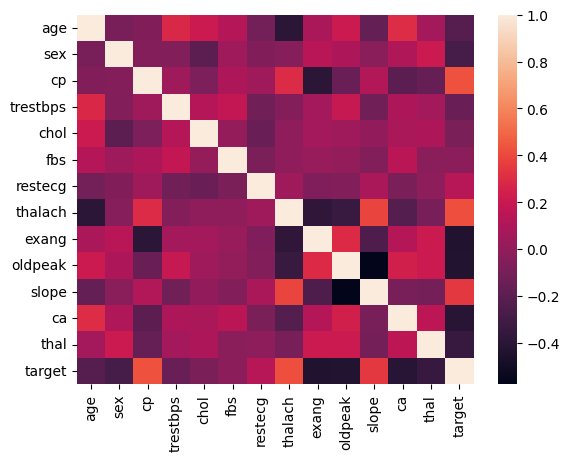

In [21]:
sns.heatmap(data.corr())

In [22]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

Text(0, 0.5, 'Counts')

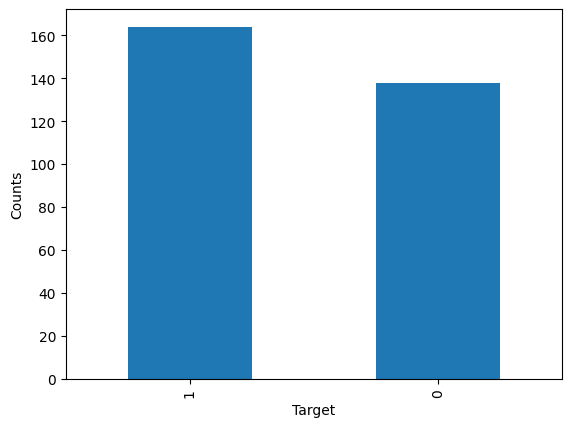

In [23]:
#How namy people have heart disease
data['target'].value_counts().plot.bar() 
plt.xlabel('Target')
plt.ylabel('Counts')

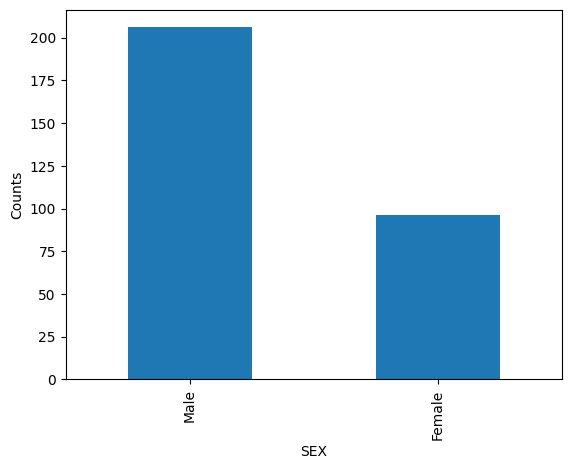

In [24]:
#Which Sex has the most Heart disease
data['sex'].value_counts().plot.bar()
plt.xlabel('SEX')
plt.ylabel('Counts')
plt.xticks([0,1],['Male','Female'])
plt.show()

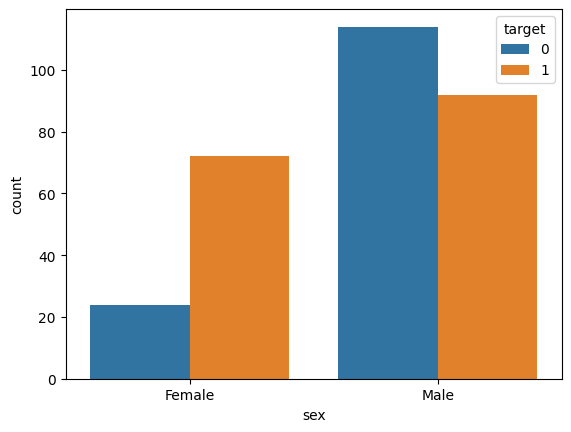

In [25]:
#Gender distribution according to target variable
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([0,1],['Female','Male'])
plt.show()


Text(0, 0.5, 'Count')

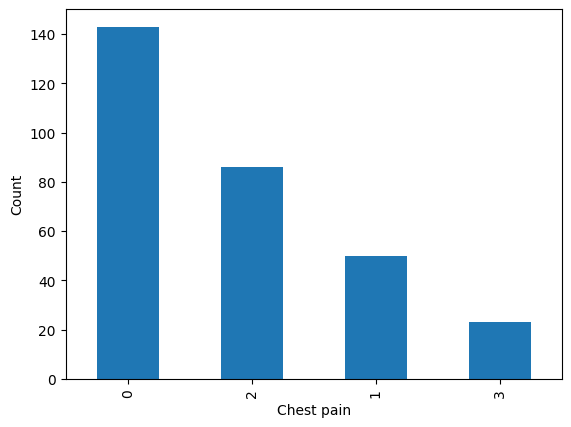

In [26]:
#Check type of chest pain
data["cp"].value_counts().plot.bar()
plt.xlabel('Chest pain')
plt.ylabel('Count')



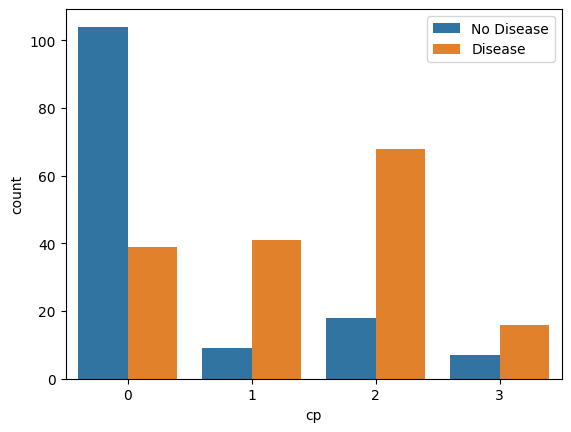

In [27]:
#count of chest pain with respect to target
sns.countplot(x='cp',hue="target",data=data)
plt.legend(labels=['No Disease','Disease'])
plt.show()

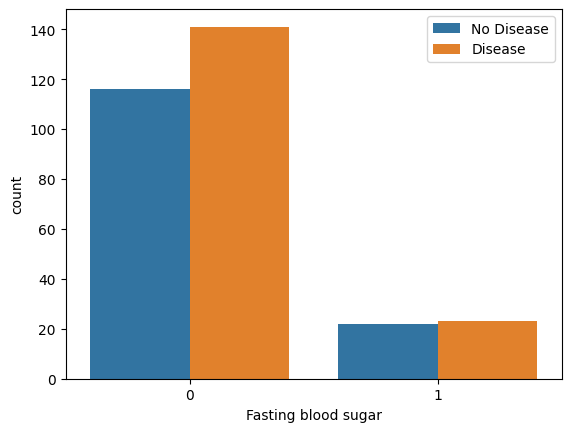

In [28]:
#Fasting blood sugar with target
sns.countplot(x='fbs',hue="target",data=data)
plt.xlabel("Fasting blood sugar")
plt.legend(labels=['No Disease','Disease'])
plt.show()

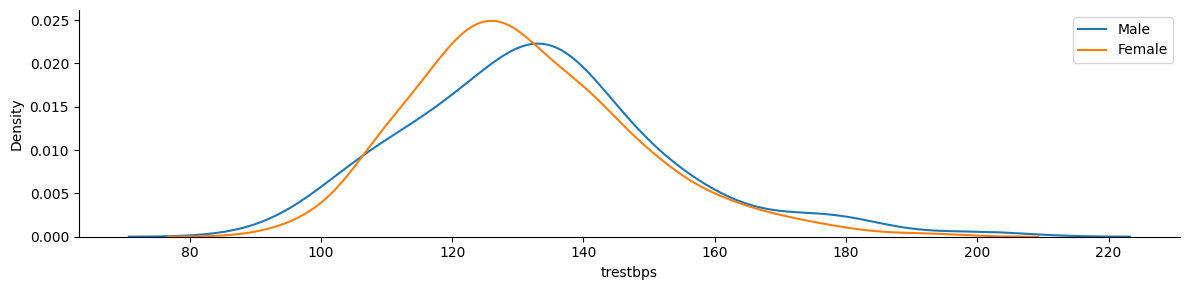

In [29]:
#Compare Resting Blood pressure as per gender 
Graph=sns.FacetGrid(data,hue='sex',aspect=4)
Graph.map(sns.kdeplot,'trestbps')
plt.legend(labels=['Male','Female'])

plt.show()

# Model Implementation

# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_train_knn=knn.predict(X_train)
y_pred_test_knn=knn.predict(X_test)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
decision_tree= DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred_train_dt=decision_tree.predict(X_train)
y_pred_test_dt=decision_tree.predict(X_test)

# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(X_train,y_train)
y_pred_train_nb=naive.predict(X_train)
y_pred_test_nb=naive.predict(X_test)



# Model Evaluation

In [33]:
#Import libraries
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score,roc_auc_score

# For KNN

In [34]:
print("Model evaluation for K Nearest Neighbors\n")
print("------------------Model Evaluation for Training Data----------------------- ")

print("The accuracy score for knn is:", accuracy_score(y_train,y_pred_train_knn))
print("The precision score for knn is:",precision_score(y_train,y_pred_train_knn))
print("The f1 score for knn is:",f1_score(y_train,y_pred_train_knn))
print("The Recall Score for knn is :",recall_score(y_train,y_pred_train_knn))
print("The ROC AUC score for knn is:",roc_auc_score(y_train,y_pred_train_knn))

print ("----------------Model Evaluation for Testing Data--------------------------")

print("The accuracy score for knn is:", accuracy_score(y_test,y_pred_test_knn))
print("The precision score for knn is:",precision_score(y_test,y_pred_test_knn))
print("The f1 score for knn is:",f1_score(y_test,y_pred_test_knn))
print("The Recall Score for knn is :",recall_score(y_test,y_pred_test_knn))
print("The ROC AUC score for knn is:",roc_auc_score(y_test,y_pred_test_knn))


Model evaluation for K Nearest Neighbors

------------------Model Evaluation for Training Data----------------------- 
The accuracy score for knn is: 0.861878453038674
The precision score for knn is: 0.8446601941747572
The f1 score for knn is: 0.8743718592964823
The Recall Score for knn is : 0.90625
The ROC AUC score for knn is: 0.8590073529411765
----------------Model Evaluation for Testing Data--------------------------
The accuracy score for knn is: 0.8181818181818182
The precision score for knn is: 0.8108108108108109
The f1 score for knn is: 0.8450704225352113
The Recall Score for knn is : 0.8823529411764706
The ROC AUC score for knn is: 0.8091009988901221


# Decision Tree

In [35]:
print("Model evaluation for Decision Tree\n")
print("-------------------------Model Evaluation for train data-----------------")
print("The accuracy score for Decision Tree is:", accuracy_score(y_train,y_pred_train_dt))
print("The precision score for Decision Tree is:",precision_score(y_train,y_pred_train_dt))
print("The f1 score for Decision Tree is:",f1_score(y_train,y_pred_train_dt))
print("The Recall Score for Decision Tree is :",recall_score(y_train,y_pred_train_dt))
print("The ROC AUC score for Decision Tree is:",roc_auc_score(y_train,y_pred_train_dt))

print("-------------Model Evaluation for test data-----------")
print("The accuracy score for Decision Tree is:", accuracy_score(y_test,y_pred_test_dt))
print("The precision score for Decision Tree is:",precision_score(y_test,y_pred_test_dt))
print("The f1 score for Decision Tree is:",f1_score(y_test,y_pred_test_dt))
print("The Recall Score for Decision Tree is :",recall_score(y_test,y_pred_test_dt))
print("The ROC AUC score for Decision Tree is:",roc_auc_score(y_test,y_pred_test_dt))

Model evaluation for Decision Tree

-------------------------Model Evaluation for train data-----------------
The accuracy score for Decision Tree is: 1.0
The precision score for Decision Tree is: 1.0
The f1 score for Decision Tree is: 1.0
The Recall Score for Decision Tree is : 1.0
The ROC AUC score for Decision Tree is: 1.0
-------------Model Evaluation for test data-----------
The accuracy score for Decision Tree is: 0.6859504132231405
The precision score for Decision Tree is: 0.7272727272727273
The f1 score for Decision Tree is: 0.7164179104477613
The Recall Score for Decision Tree is : 0.7058823529411765
The ROC AUC score for Decision Tree is: 0.6831298557158714


# Naive Bayes

In [36]:
print("Model evaluation for Naive Bayes\n")
print("----------------Model Evaluation for test data------------------")
print("The accuracy score for Naive Bayes is:", accuracy_score(y_train,y_pred_train_nb))
print("The precision score for Naive Bayes is:",precision_score(y_train,y_pred_train_nb))
print("The f1 score for Naive Bayes is:",f1_score(y_train,y_pred_train_nb))
print("The Recall Score for Naive Bayes is :",recall_score(y_train,y_pred_train_nb))
print("The ROC AUC score for Naive Bayes is:",roc_auc_score(y_train,y_pred_train_nb))

print("-------------------Model evaluation for test data---------------")
print("The accuracy score for Naive Bayes is:", accuracy_score(y_test,y_pred_test_nb))
print("The precision score for Naive Bayes is:",precision_score(y_test,y_pred_test_nb))
print("The f1 score for Naive Bayes is:",f1_score(y_test,y_pred_test_nb))
print("The Recall Score for Naive Bayes is :",recall_score(y_test,y_pred_test_nb))
print("The ROC AUC score for Naive Bayes is:",roc_auc_score(y_test,y_pred_test_nb))

Model evaluation for Naive Bayes

----------------Model Evaluation for test data------------------
The accuracy score for Naive Bayes is: 0.850828729281768
The precision score for Naive Bayes is: 0.8285714285714286
The f1 score for Naive Bayes is: 0.8656716417910447
The Recall Score for Naive Bayes is : 0.90625
The ROC AUC score for Naive Bayes is: 0.8472426470588235
-------------------Model evaluation for test data---------------
The accuracy score for Naive Bayes is: 0.8512396694214877
The precision score for Naive Bayes is: 0.8571428571428571
The f1 score for Naive Bayes is: 0.8695652173913043
The Recall Score for Naive Bayes is : 0.8823529411764706
The ROC AUC score for Naive Bayes is: 0.8468368479467259


# Cross Validation and Overfitting


# Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score,KFold
CVS=cross_val_score
k_folds=KFold(n_splits=10,shuffle=True,random_state=40)

# For Knn

In [38]:
#Check the over fitting
Train_score=knn.score(X_train,y_train)
Test_score=knn.score(X_test,y_test)
if Train_score > Test_score:
    print("KNN Model is Overfit")
    print("Training Scores: ",Train_score)
    print("Testing Score:",Test_score)
else:
    print("KNN model is not overfit:")
    print("Training Scores: ",Train_score)
    print("Testing Score:",Test_score)
    

KNN Model is Overfit
Training Scores:  0.861878453038674
Testing Score: 0.8181818181818182


In [39]:
score_knn=CVS(knn,X_test,y_test,cv=10)
score_knn

array([0.84615385, 0.75      , 0.75      , 0.75      , 0.83333333,
       0.83333333, 1.        , 0.83333333, 0.83333333, 0.66666667])

In [40]:
from sklearn import metrics
k_folds=KFold(n_splits=10,shuffle=True,random_state=40)

Train_score=[]
Test_score=[]
for train_index,test_index in k_folds.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train,y_train)
    Test_score.append(accuracy_test)
    Train_score.append(accuracy_train)
print("\nTraining Accuracy Scores for Each Fold:")
for fold, score in enumerate(Train_score):
    print(f"Fold {fold+1}: {score}")

print("\nTesting Accuracy Scores for Each Fold:")
for fold, score in enumerate(Test_score):
    print(f"Fold {fold+1}: {score}")
average_accuracy_train = sum(Train_score) / len(Train_score)
print("\nAverage Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(Test_score) / len(Test_score)
print("\nAverage Accuracy Testing Score:", average_accuracy_test)



Training Accuracy Scores for Each Fold:
Fold 1: 0.7564575645756457
Fold 2: 0.7527675276752768
Fold 3: 0.7720588235294118
Fold 4: 0.7720588235294118
Fold 5: 0.7904411764705882
Fold 6: 0.7647058823529411
Fold 7: 0.7683823529411765
Fold 8: 0.7573529411764706
Fold 9: 0.7647058823529411
Fold 10: 0.7757352941176471

Testing Accuracy Scores for Each Fold:
Fold 1: 0.5806451612903226
Fold 2: 0.6129032258064516
Fold 3: 0.7333333333333333
Fold 4: 0.7333333333333333
Fold 5: 0.6333333333333333
Fold 6: 0.6666666666666666
Fold 7: 0.6333333333333333
Fold 8: 0.6666666666666666
Fold 9: 0.5666666666666667
Fold 10: 0.7

Average Accuracy Training Score: 0.7674666268721511

Average Accuracy Testing Score: 0.6526881720430108


# For Decision Tree

In [41]:
#Check Overfitting
Train_score=decision_tree.score(X_train,y_train)
Test_score=decision_tree.score(X_test,y_test)
if Train_score > Test_score:
    print("Decision Tree Model is Overfit")
    print("Training Scores: ",Train_score)
    print("Testing Score:",Test_score)
else:
    print("Decision Tree model is not overfit:")
    print("Training Scores: ",Train_score)
    print("Testing Score:",Test_score)
    

Decision Tree model is not overfit:
Training Scores:  0.44485294117647056
Testing Score: 0.5333333333333333


In [42]:
#As There is overfitting there is no need of cross validation

# For Naive Bayes

In [43]:
#Check overfitting
Train_score=naive.score(X_train,y_train)
Test_score=naive.score(X_test,y_test)
if Train_score > Test_score:
    print("Naive Bayes Model is Overfit")
    print("Training Scores: ",Train_score)
    print("Testing Score:",Test_score)
else:
    print("Naive Bayes is not overfit:")
    print("Training Scores: ",Train_score)
    print("Testing Score:",Test_score)
    

Naive Bayes is not overfit:
Training Scores:  0.40441176470588236
Testing Score: 0.4666666666666667


In [44]:
#Same Naive bayes is not overfit  so there is no need to cross validation